In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [3]:
data = pd.read_csv("Fraud_check.csv")

In [4]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
data.isnull().value_counts()

Undergrad  Marital.Status  Taxable.Income  City.Population  Work.Experience  Urban
False      False           False           False            False            False    600
dtype: int64

In [7]:
data["Fraud_check"] = data["Taxable.Income"].apply(lambda x:"Risky" if x<=30000  else "Good")
#using lambda fuction for convert into catagorical data in condition method

In [8]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud_check
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


<Axes: >

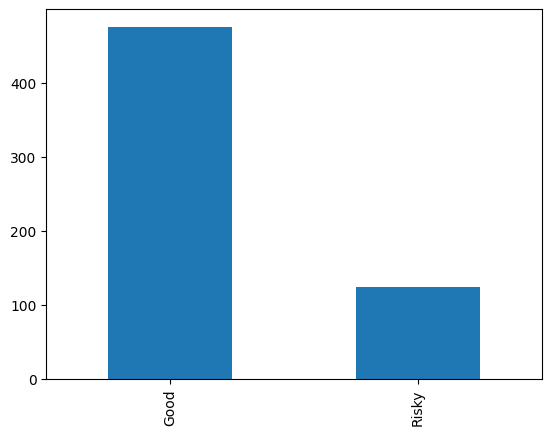

In [9]:
data["Fraud_check"].value_counts().plot.bar()

In [10]:
x= data.drop("Fraud_check",axis=1)

In [11]:
y=data["Fraud_check"]

In [12]:
x.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [13]:
y.head(3)

0    Good
1    Good
2    Good
Name: Fraud_check, dtype: object

In [14]:
col = x.select_dtypes("object")

In [15]:
col

,Undergrad,Marital.Status,Urban
0,NO,Single,YES
1,YES,Divorced,YES
2,NO,Married,YES
3,YES,Single,YES
4,NO,Married,NO
...,...,...,...
595,YES,Divorced,YES
596,YES,Divorced,YES
597,NO,Divorced,YES
598,YES,Married,NO


In [16]:
label_encoder = preprocessing.LabelEncoder()


In [17]:
for i in col.columns:
  x[i] = label_encoder.fit_transform(x[i])
  #data preprocessing convert catagorical into numerical

In [18]:
x.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
#splt the test &train data with 30% test data

In [20]:
x_train.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
516,1,2,99239,76337,18,1
261,0,2,70645,68788,7,1
316,0,1,48192,70323,25,0
539,1,0,32948,57390,8,0
591,1,2,27394,132859,18,1


Create the Model

In [21]:
model=DecisionTreeClassifier(criterion="gini")

In [22]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
import matplotlib.pyplot as plt
from sklearn import tree

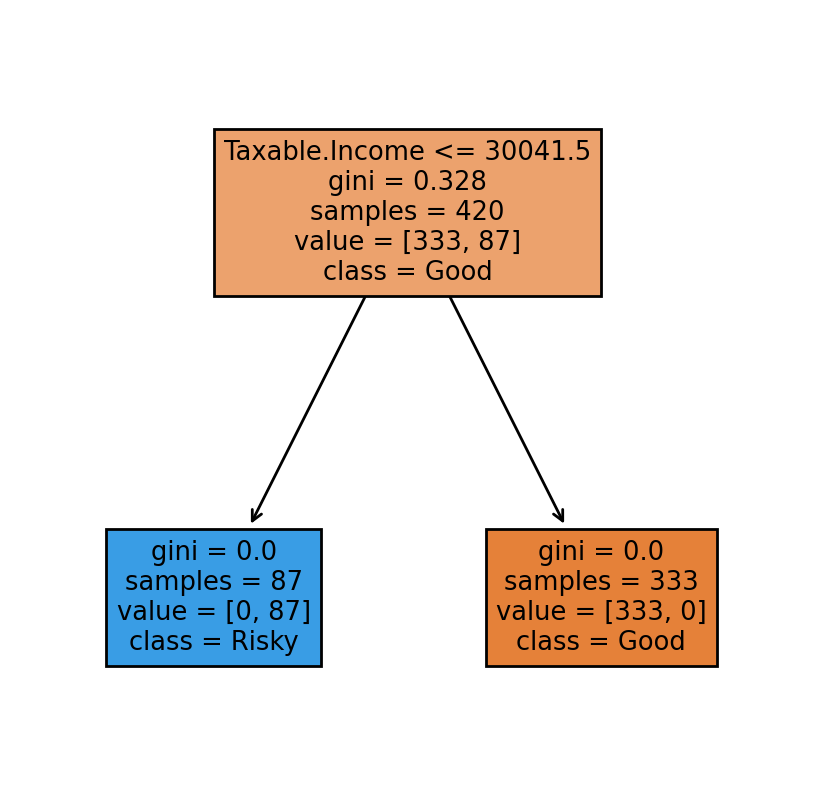

In [24]:

plt.subplots(figsize= (5,5),dpi=200)
tree.plot_tree(model,feature_names=x.columns,class_names=y.unique(),filled=True);
# Genarate the tree



In [25]:
y_predict = model.predict(x_test)

In [26]:
print(classification_report(y_test,y_predict))
#Model Evaluation

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       143
       Risky       1.00      1.00      1.00        37

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test,y_predict)
cm

array([[143,   0],
       [  0,  37]])

<Axes: >

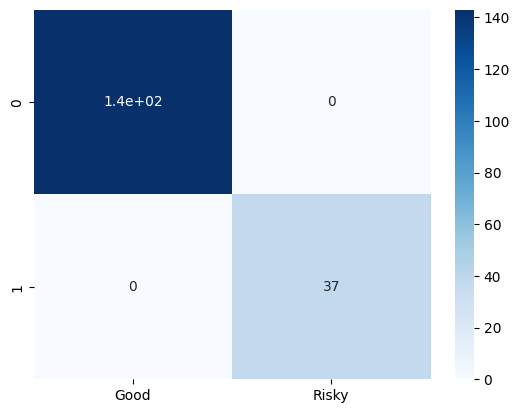

In [28]:
sns.heatmap(cm,annot=True,cmap="Blues",xticklabels=["Good","Risky"])